# System

In [1]:
# To show the python version
import sys
assert sys.version_info >= (3,8)
print(sys.version_info)

# to show all the output from a code chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# matplotlib for plotting
from matplotlib import pyplot as plt
%matplotlib inline

# Other external libraries like pandas and numpy
import pandas as pd
import numpy as np
np.random.seed(999)

# machine learning models
import sklearn
print(sklearn.__version__)

#import others
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

sys.version_info(major=3, minor=10, micro=10, releaselevel='final', serial=0)
1.1.1


# Import Training Data

In [2]:
from scipy.io import arff
# Load the arff file
header_info = arff.loadarff("Dataset/KDDTrain+.arff")
df = pd.DataFrame(header_info[0])
header_names = df.columns.values.tolist()
header_names.append('Difficulty')
kdd_train = pd.read_csv('Dataset/KDDTrain+.txt', delimiter = ',', header = None)

#Rename the headers
kdd_train.columns = header_names

# Data Preprocessing

In [3]:
#Drop the target variables
kdd_train_x = kdd_train.drop(['class', 'Difficulty'], axis = 1)
y = ['class']
kdd_train_y = kdd_train[y]

#Identify categorical features
num_cols = kdd_train_x._get_numeric_data().columns
cate_cols = list(set(kdd_train_x.columns) - set(num_cols))


#One-Hot Encoding the categorical features
cate_features = pd.get_dummies(kdd_train_x[cate_cols], prefix = cate_cols)
one_hot_data = kdd_train_x.drop(cate_cols, axis = 1)
one_hot_data_maha = pd.concat([one_hot_data, cate_features], axis = 1)
one_hot_data_if = one_hot_data_maha
one_hot_data_if.head()
one_hot_data_maha.head()
data_array = np.array(one_hot_data_maha)
data_array.shape    # Make sure that the Numpy array dimension is consistent with the Pandas Dataframe
# function to calculate mahalanobis distance


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


(125973, 122)

In [4]:
label_map = {"normal": 0,
            "neptune": 1,
            "satan": 1,
            "ipsweep": 1,
            "portsweep": 1,
            "smurf": 1,
            "nmap": 1,
            "back": 1,
            "teardrop": 1,
            "warezclient": 1,
            "pod": 1,
            "guess_passwd": 1,
            "buffer_overflow": 1,
            "warezmaster": 1,
            "land": 1,
            "imap": 1,
            "rootkit": 1,
            "loadmodule": 1,
            "ftp_write": 1,
            "multihop": 1,
            "phf": 1,
            "perl": 1, 
            "spy": 1}
kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)

C:\Users\khxia\AppData\Local\Temp\ipykernel_21320\3533821117.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)


# PCA

In [5]:
from sklearn.decomposition import PCA
one_hot_data_pca = one_hot_data_maha
pca = PCA()
data_pca = pca.fit(one_hot_data_pca)

[6.80620901e-01 3.19378965e-01 1.33150122e-07 4.23697496e-10
 2.02383182e-10 1.24381501e-10 4.39643584e-11 2.30119764e-11
 9.04580682e-14 1.49465632e-14 1.35035247e-14 6.51697385e-15
 5.36800158e-15 4.53493599e-15 2.66553461e-15 2.28654043e-15
 1.78236719e-15 1.25470976e-15 1.12312934e-15 1.05627033e-15
 8.29140078e-16 7.02122315e-16 5.21738090e-16 5.04079197e-16
 4.34824444e-16 3.68617233e-16 3.25637543e-16 3.00747065e-16
 2.92748973e-16 2.66231907e-16 2.11898577e-16 1.88191884e-16
 1.66609040e-16 1.52758653e-16 1.50463458e-16 1.39673498e-16
 1.33448299e-16 1.31054779e-16 1.17441266e-16 1.11811934e-16
 1.10593527e-16 1.10021106e-16 1.08361624e-16 1.07813373e-16
 1.06175042e-16 1.04618356e-16 1.02518498e-16 1.00003063e-16
 9.77663500e-17 9.66728268e-17 9.56958456e-17 9.33542450e-17
 9.20265906e-17 8.87346062e-17 8.71344948e-17 8.53404157e-17
 8.38419881e-17 8.30188771e-17 8.17116955e-17 8.04730638e-17
 7.77072170e-17 7.53428612e-17 7.48918304e-17 7.46102704e-17
 7.30869592e-17 7.183045

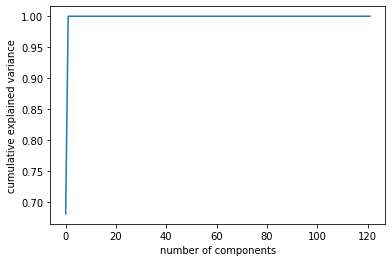

In [6]:
print(data_pca.explained_variance_ratio_)

plt.plot(np.cumsum(data_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
print(pca.singular_values_)

[2.08352935e+09 1.42725028e+09 9.21547588e+05 5.19846269e+04
 3.59280952e+04 2.81659808e+04 1.67454704e+04 1.21150146e+04
 7.59574956e+02 3.08757598e+02 2.93474624e+02 2.03877816e+02
 1.85034751e+02 1.70071900e+02 1.30388457e+02 1.20763704e+02
 1.06621693e+02 8.94578840e+01 8.46373134e+01 8.20794662e+01
 7.27211833e+01 6.69196053e+01 5.76863758e+01 5.67017379e+01
 5.26628015e+01 4.84880591e+01 4.55736925e+01 4.37973347e+01
 4.32110354e+01 4.12075728e+01 3.67630049e+01 3.46455474e+01
 3.25983984e+01 3.12140336e+01 3.09786510e+01 2.98472269e+01
 2.91745055e+01 2.89116857e+01 2.73689001e+01 2.67049066e+01
 2.65590073e+01 2.64901847e+01 2.62896458e+01 2.62230558e+01
 2.60230505e+01 2.58315775e+01 2.55710229e+01 2.52553641e+01
 2.49713306e+01 2.48312848e+01 2.47054930e+01 2.44013592e+01
 2.42272237e+01 2.37899482e+01 2.35744756e+01 2.33305168e+01
 2.31247884e+01 2.30109956e+01 2.28291159e+01 2.26554270e+01
 2.22626911e+01 2.19213874e+01 2.18556741e+01 2.18145516e+01
 2.15907103e+01 2.140431

In [8]:
num_components = 3
pca = PCA(num_components)
data_pca = pca.fit_transform(one_hot_data_pca) #fit and reduce dimension

In [9]:
data_pca.shape

(125973, 3)

In [10]:
pca = PCA(n_components = 0.99)
data_pca = pca.fit_transform(one_hot_data_pca)
print(pca.n_components_)

2


In [11]:
data_pca.shape

(125973, 2)

In [12]:
pd.DataFrame(pca.components_,columns = one_hot_data_pca.columns)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.000031,1.000000,0.000263,-2.624451e-13,-2.991806e-11,-1.438399e-13,1.079988e-10,-1.604198e-12,-2.793301e-10,-3.481197e-10,...,-1.590473e-11,-3.658587e-10,6.863453e-14,-1.237591e-12,2.290979e-12,-5.084570e-10,-2.844905e-12,-8.638300e-11,2.435333e-10,-1.571504e-10
1,0.000023,-0.000263,1.000000,-2.425958e-13,-2.773352e-11,8.867691e-13,-1.839449e-10,5.670452e-12,-3.517904e-10,7.339008e-09,...,1.013486e-09,-3.381883e-10,1.963442e-12,1.693637e-12,-3.776510e-13,-5.501875e-10,-2.629739e-12,-8.045485e-11,2.254232e-10,-1.449683e-10


# Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(one_hot_data_maha)

In [14]:
one_hot_data_ss = ss.transform(one_hot_data_maha)

In [15]:
one_hot_data_ss

array([[-0.11024922, -0.0076786 , -0.00491864, ..., -0.26542904,
         0.47617527, -0.36755464],
       [-0.11024922, -0.00773737, -0.00491864, ..., -0.26542904,
        -2.10006708,  2.72068392],
       [-0.11024922, -0.00776224, -0.00491864, ..., -0.26542904,
         0.47617527, -0.36755464],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ..., -0.26542904,
         0.47617527, -0.36755464],
       [-0.11024922, -0.00776224, -0.00491864, ..., -0.26542904,
         0.47617527, -0.36755464],
       [-0.11024922, -0.00773652, -0.00491864, ..., -0.26542904,
         0.47617527, -0.36755464]])

In [18]:
one_hot_data_pca2 = one_hot_data_ss
pca = PCA()
data_pca2 = pca.fit(one_hot_data_pca2)

[7.97429121e-02 5.03273966e-02 3.38327261e-02 2.47551049e-02
 2.36648847e-02 2.20071279e-02 1.81141498e-02 1.44314665e-02
 1.31683096e-02 1.20239487e-02 1.11590085e-02 1.04072480e-02
 1.03328937e-02 9.97041887e-03 9.78796915e-03 9.58597890e-03
 9.34820304e-03 9.29451603e-03 8.99814888e-03 8.67011111e-03
 8.57036196e-03 8.42681402e-03 8.41258387e-03 8.40565934e-03
 8.37249703e-03 8.35107714e-03 8.32009600e-03 8.31889887e-03
 8.31321173e-03 8.31097018e-03 8.31024962e-03 8.30937819e-03
 8.30861757e-03 8.30811446e-03 8.30559672e-03 8.30501303e-03
 8.30352490e-03 8.30259535e-03 8.30159710e-03 8.30023504e-03
 8.29978401e-03 8.29880433e-03 8.29773477e-03 8.29704090e-03
 8.29662969e-03 8.29596819e-03 8.29519291e-03 8.29487452e-03
 8.29415763e-03 8.29360741e-03 8.29251196e-03 8.29215858e-03
 8.29132594e-03 8.29029978e-03 8.28890225e-03 8.28823769e-03
 8.28731976e-03 8.28702570e-03 8.28562708e-03 8.28400413e-03
 8.28161718e-03 8.27663501e-03 8.27253814e-03 8.27069796e-03
 8.26988891e-03 8.268757

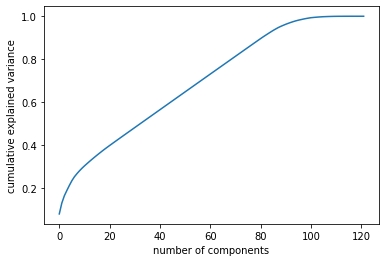

In [19]:
print(data_pca2.explained_variance_ratio_)

plt.plot(np.cumsum(data_pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
print(pca.n_components_)

122


In [21]:
num_components = 122
pca = PCA(num_components)
data_pca2 = pca.fit_transform(one_hot_data_pca2) #fit and reduce dimension

In [27]:
pca.components_.shape

(122, 122)

In [23]:
ss_pca = pd.DataFrame(pca.components_,columns = one_hot_data_maha.columns)
ss_pca

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,6.452230e-03,5.147789e-04,3.548242e-04,1.966669e-03,-8.639281e-03,-1.195329e-03,-1.725436e-02,-1.490183e-03,-2.095213e-01,-2.323876e-03,...,0.015825,0.278946,-0.002059,-0.003623,-0.001276,-0.295046,0.014920,-0.077517,0.105394,-0.066980
1,1.086738e-01,5.860716e-03,6.605722e-03,-4.514528e-03,6.287692e-03,6.409190e-05,-7.591322e-03,9.492794e-03,-8.396235e-02,-1.226044e-04,...,0.157455,-0.176767,-0.008587,-0.005979,-0.002380,-0.091619,-0.001663,-0.007807,0.007789,-0.003359
2,-2.441915e-02,1.419446e-03,-8.604447e-04,-4.808918e-03,-7.265814e-02,3.652077e-03,6.041813e-02,1.031106e-02,3.083276e-01,1.647043e-02,...,-0.005935,0.003910,0.025258,0.015925,0.008121,-0.043740,-0.012970,-0.327843,0.437107,-0.272928
3,3.225140e-02,3.244181e-03,2.179604e-03,3.419017e-02,-6.476245e-02,1.813936e-02,-1.743536e-02,1.903860e-02,5.662743e-03,1.040845e-01,...,0.033268,0.056562,0.025359,0.008832,0.006471,-0.062845,0.028436,0.293584,0.090849,-0.333718
4,1.036504e-01,4.399402e-03,4.199129e-03,-8.657563e-03,2.682633e-02,6.325753e-02,6.199159e-02,5.122335e-02,2.357286e-03,4.443914e-01,...,0.035479,-0.022938,0.038523,-0.005891,0.002272,0.031337,0.001912,-0.072594,-0.041869,0.105779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,6.675405e-16,-1.971473e-17,-3.085828e-16,6.740460e-17,1.169102e-17,-1.003699e-16,-2.626911e-17,1.130268e-16,7.282129e-16,4.024700e-15,...,-0.023107,-0.075290,-0.009046,-0.005341,-0.003319,-0.082622,-0.007798,0.329666,0.254708,0.212480
118,-0.000000e+00,-4.583874e-17,8.440000e-17,4.135307e-17,3.593666e-16,9.423859e-18,-4.231645e-16,3.866436e-17,3.701285e-15,-2.636741e-15,...,-0.095965,-0.312688,-0.037570,-0.022183,-0.013783,-0.343136,-0.032385,0.170543,0.551671,0.460210
119,-0.000000e+00,1.734723e-17,1.619822e-16,-9.340882e-17,6.802592e-17,-7.979757e-17,9.935860e-17,-7.655022e-17,-2.680032e-16,-2.141000e-15,...,0.013653,0.044488,0.005345,0.003156,0.001961,0.048820,0.004608,-0.593213,0.139638,0.116487
120,0.000000e+00,3.469447e-17,4.293921e-17,6.940700e-17,4.539653e-17,1.395752e-16,4.350979e-17,-1.427768e-16,-7.078527e-17,2.664587e-15,...,0.075236,0.245143,0.029455,0.017391,0.010806,0.269015,0.025390,0.249251,0.143402,0.119627


In [44]:
pca = PCA(n_components = 0.99)
data_pca2 = pca.fit_transform(one_hot_data_pca2)
print(pca.n_components_)

100


In [47]:
ss_pca = pd.DataFrame(pca.components_,columns = one_hot_data_maha.columns)

In [48]:
ss_pca

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0.006452,0.000515,0.000355,0.001967,-0.008639,-0.001195,-0.017254,-0.001490,-0.209521,-0.002324,...,0.015825,0.278946,-0.002059,-0.003623,-0.001276,-0.295046,0.014920,-0.077517,0.105394,-0.066980
1,0.108674,0.005861,0.006606,-0.004515,0.006288,0.000064,-0.007591,0.009493,-0.083962,-0.000123,...,0.157455,-0.176767,-0.008587,-0.005979,-0.002380,-0.091619,-0.001663,-0.007807,0.007789,-0.003359
2,-0.024419,0.001419,-0.000860,-0.004809,-0.072658,0.003652,0.060418,0.010311,0.308328,0.016470,...,-0.005935,0.003910,0.025258,0.015925,0.008121,-0.043740,-0.012970,-0.327843,0.437107,-0.272928
3,0.032251,0.003244,0.002180,0.034190,-0.064762,0.018139,-0.017435,0.019039,0.005663,0.104084,...,0.033268,0.056562,0.025359,0.008832,0.006471,-0.062845,0.028436,0.293584,0.090849,-0.333718
4,0.103650,0.004399,0.004199,-0.008658,0.026826,0.063258,0.061992,0.051223,0.002357,0.444391,...,0.035479,-0.022938,0.038523,-0.005891,0.002272,0.031337,0.001912,-0.072594,-0.041869,0.105779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005414,0.001425,0.005598,-0.020939,-0.196706,-0.014244,0.043664,0.003332,0.044707,-0.002196,...,-0.138442,-0.049235,0.011999,0.013857,0.012429,0.113183,-0.122676,-0.054038,-0.040721,0.090193
96,-0.019675,0.011046,0.001087,0.014422,-0.055094,-0.010321,0.168026,0.004188,0.189277,-0.005448,...,0.080483,-0.125614,0.038219,0.023738,0.011936,0.144215,0.046412,-0.096232,0.065519,-0.004849
97,0.074743,-0.004175,-0.000966,-0.004530,-0.004090,0.042298,0.078112,0.056099,0.003306,0.043319,...,-0.054987,0.000613,0.045388,0.000772,-0.006599,0.001636,-0.000271,-0.015751,0.003597,0.007749
98,0.008827,0.012407,-0.001357,-0.019944,0.047754,-0.001971,0.605720,0.036447,-0.043792,-0.004088,...,-0.013386,0.065542,-0.010663,-0.022943,-0.008524,-0.087936,0.000709,-0.007178,0.011270,-0.008013
